In [15]:
# Import the Pandas Library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
pd.set_option('display.max_column', 85)
%matplotlib inline

In [16]:
# Load the dataset
Ames = pd.read_csv('Ames.csv')
Ames.head()


,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,GeoRefNo,Prop_Addr,Latitude,Longitude
0,909176150,856,126000,30,RL,NaN,7890,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,SWISU,Norm,Norm,1Fam,1Story,6,6,1939,1950,Gable,CompShg,Wd Sdng,Wd Sdng,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,238.0,Unf,0.0,618.0,856.0,GasA,TA,Y,SBrkr,856,0,0,1.0,0.0,1,0,2,1,TA,4,Typ,1,Gd,Detchd,1939.0,Unf,2.0,399.0,TA,TA,Y,0,0,0,0,166,0,NaN,NaN,NaN,0,3,2010,WD,Normal,909176150.0,436 HAYWARD AVE,42.018564,-93.651619
1,905476230,1049,139500,120,RL,42.0,4235,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,1Story,5,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,BrkFace,149.0,Gd,TA,CBlock,Gd,TA,Mn,GLQ,552.0,ALQ,393.0,104.0,1049.0,GasA,TA,Y,SBrkr,1049,0,0,1.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1984.0,Fin,1.0,266.0,TA,TA,Y,0,105,0,0,0,0,NaN,NaN,NaN,0,2,2009,WD,Normal,905476230.0,3416 WEST ST,42.024855,-93.663671
2,911128020,1001,124900,30,C (all),60.0,6060,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,5,9,1930,2007,Hip,CompShg,MetalSd,MetalSd,NaN,0.0,Gd,TA,BrkTil,TA,TA,No,ALQ,737.0,Unf,0.0,100.0,837.0,GasA,Ex,Y,SBrkr,1001,0,0,0.0,0.0,1,0,2,1,Gd,5,Typ,0,NaN,Detchd,1930.0,Unf,1.0,216.0,TA,Po,N,154,0,42,86,0,0,NaN,NaN,NaN,0,11,2007,WD,Normal,911128020.0,320 S 2ND ST,42.021548,-93.614068
3,535377150,1039,114000,70,RL,80.0,8146,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,2Story,4,8,1900,2003,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,Gd,Gd,BrkTil,Fa,TA,No,Unf,0.0,Unf,0.0,405.0,405.0,GasA,Gd,Y,SBrkr,717,322,0,0.0,0.0,1,0,2,1,TA,6,Typ,0,NaN,Detchd,1940.0,Unf,1.0,281.0,TA,TA,N,0,0,168,0,111,0,NaN,NaN,NaN,0,5,2009,WD,Normal,535377150.0,1524 DOUGLAS AVE,42.037391,-93.612207
4,534177230,1665,227000,60,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,2Story,8,6,2001,2001,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,643.0,Unf,0.0,167.0,810.0,GasA,Ex,Y,SBrkr,810,855,0,1.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,2001.0,Fin,2.0,528.0,TA,TA,Y,0,45,0,0,0,0,NaN,NaN,NaN,0,11,2009,WD,Normal,534177230.0,2304 FILLMORE AVE,42.044554,-93.631818


In [17]:
# Define the quartiles
quantiles = Ames['SalePrice'].quantile([0.25, 0.5, 0.75])

# Function to categorize each row
def categorize_by_price(row):
    if row['SalePrice'] <= quantiles.iloc[0]:
        return 'Low'
    elif row['SalePrice'] <= quantiles.iloc[1]:
        return 'Medium'
    elif row['SalePrice'] <= quantiles.iloc[2]:
        return 'High'
    else:
        return 'Premium'

# Apply the function to create a new column
Ames['Price_Category'] = Ames.apply(categorize_by_price, axis=1)
print(Ames[['SalePrice','Price_Category']])

      SalePrice Price_Category
0        126000            Low
1        139500         Medium
2        124900            Low
3        114000            Low
4        227000        Premium
...         ...            ...
2574     121000            Low
2575     139600         Medium
2576     145000         Medium
2577     217500        Premium
2578     215000        Premium

[2579 rows x 2 columns]


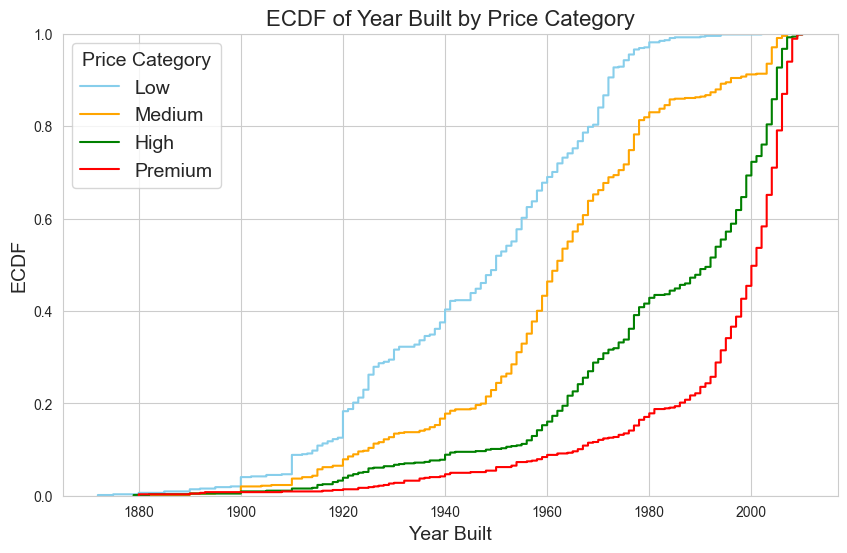

In [18]:
# Split original dataset into 4 DataFrames by Price Category
low_priced_homes = Ames.query('Price_Category == "Low"')
medium_priced_homes = Ames.query('Price_Category == "Medium"')
high_priced_homes = Ames.query('Price_Category == "High"')
premium_priced_homes = Ames.query('Price_Category == "Premium"')

# Create a figure
plt.figure(figsize=(10, 6))

# Plot each ECDF on the same figure
sns.ecdfplot(data=low_priced_homes, x='YearBuilt', color='skyblue', label='Low')
sns.ecdfplot(data=medium_priced_homes, x='YearBuilt', color='orange', label='Medium')
sns.ecdfplot(data=high_priced_homes, x='YearBuilt', color='green', label='High')
sns.ecdfplot(data=premium_priced_homes, x='YearBuilt', color='red', label='Premium')

# Adding labels and title for clarity
plt.title('ECDF of Year Built by Price Category', fontsize=16)
plt.xlabel('Year Built', fontsize=14)
plt.ylabel('ECDF', fontsize=14)
plt.legend(title='Price Category', title_fontsize=14, fontsize=14)

# Show the plot
plt.show()

From the plot, it is evident that lower and medium-priced homes have a higher frequency of being built in earlier years, while high and premium-priced homes tend to be of more recent construction. 

In [20]:
# Stacking Low and Medium categories into an "affordable_homes" DataFrame
affordable_homes = pd.concat([low_priced_homes, medium_priced_homes])

# Stacking High and Premium categories into a "luxury_homes" DataFrame
luxury_homes = pd.concat([high_priced_homes, premium_priced_homes])

In [22]:
affordable_homes.Price_Category.unique()

array(['Low', 'Medium'], dtype=object)

In [23]:
luxury_homes.Price_Category.unique()

array(['High', 'Premium'], dtype=object)

In [24]:
# Creating pivot tables with both mean living area and home count
pivot_affordable = affordable_homes.pivot_table(index='Fireplaces', 
                                                aggfunc={'GrLivArea': 'mean', 'Fireplaces': 'count'})
pivot_luxury = luxury_homes.pivot_table(index='Fireplaces', 
                                        aggfunc={'GrLivArea': 'mean', 'Fireplaces': 'count'})


In [25]:
pivot_affordable

,Fireplaces,GrLivArea
Fireplaces,,
0,931,1159.050483
1,323,1296.808050
2,38,1379.947368


In [ ]:
# Renaming columns and index labels separately
pivot_affordable.rename(columns={'GrLivArea': 'AvLivArea', 'Fireplaces': 'HmCount'}, inplace=True)
pivot_affordable.index.name = 'Fire'

pivot_luxury.rename(columns={'GrLivArea': 'AvLivArea', 'Fireplaces': 'HmCount'}, inplace=True)
pivot_luxury.index.name = 'Fire'  

# View the pivot tables
print(pivot_affordable)
print(pivot_luxury)